In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding ='latin-1')

In [3]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
#Combine release year, month and day
df['released_date']=pd.to_datetime(df['released_year'].astype(str)+'-'+ df['released_month'].astype(str)+'-'+df['released_day'].astype(str))

In [5]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


In [6]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
released_date            0
dtype: int64

In [7]:
df['key'].fillna(0,inplace=True)
df['in_shazam_charts'].fillna(0,inplace=True)

/tmp/ipykernel_18/2436641756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['key'].fillna(0,inplace=True)
/tmp/ipykernel_18/2436641756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({co

In [8]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
released_date           0
dtype: int64

In [9]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,2018-09-10 05:09:45.519412480
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,2020-06-28 00:00:00
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,2022-11-04 00:00:00
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,NaN


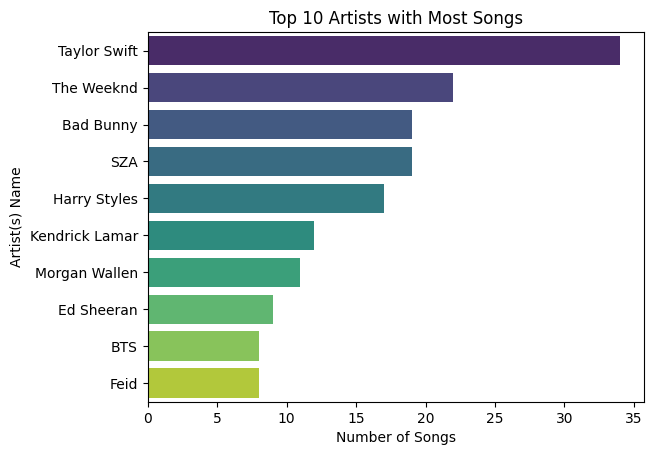

artist(s)_name
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64

In [10]:
top_10_artists = df['artist(s)_name'].value_counts().head(10)

sns.barplot(x=top_10_artists.values, y=top_10_artists.index, palette = 'viridis')
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()
top_10_artists

In [11]:
df.dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
released_year                    int64
released_month                   int64
released_day                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                         object
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists             object
in_deezer_charts                 int64
in_shazam_charts                object
bpm                              int64
key                             object
mode                            object
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
released_date           datetime64[ns]
dtype: object

In [12]:
#Remove non-numeric values from 'streams' colun and convert to integer
df['streams']= pd.to_numeric(df['streams'],errors ='coerce')
df.dtypes

track_name                      object
artist(s)_name                  object
artist_count                     int64
released_year                    int64
released_month                   int64
released_day                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                        float64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists             object
in_deezer_charts                 int64
in_shazam_charts                object
bpm                              int64
key                             object
mode                            object
danceability_%                   int64
valence_%                        int64
energy_%                         int64
acousticness_%                   int64
instrumentalness_%               int64
liveness_%                       int64
speechiness_%                    int64
released_date           datetime64[ns]
dtype: object

in_spotify_playlists     int64
in_spotify_charts        int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_charts         int64
in_deezer_playlists     object
dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

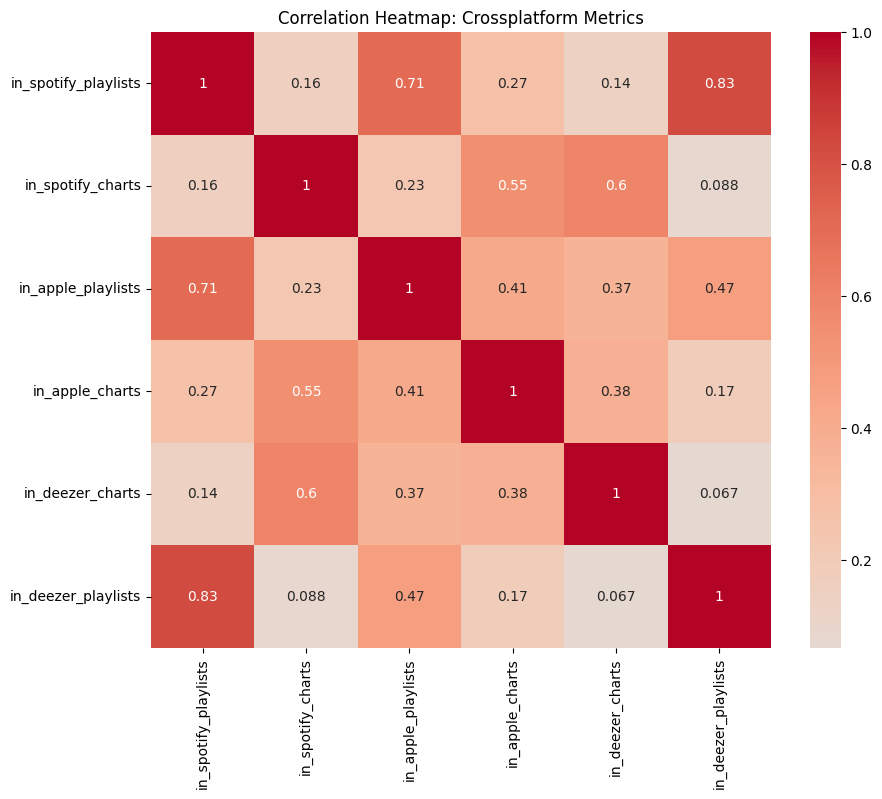

In [13]:
cross_platform_columns=[
    'in_spotify_playlists','in_spotify_charts','in_apple_playlists', 'in_apple_charts','in_deezer_charts','in_deezer_playlists',
]
# Vérifier le type des colonnes
print(df[cross_platform_columns].dtypes)

# Convertir les colonnes en chaînes de caractères si elles ne le sont pas déjà
df[cross_platform_columns] = df[cross_platform_columns].astype(str)

# Nettoyer les données dans les colonnes cross_platform_columns
for col in cross_platform_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

correlation_matrix= df[cross_platform_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Crossplatform Metrics')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

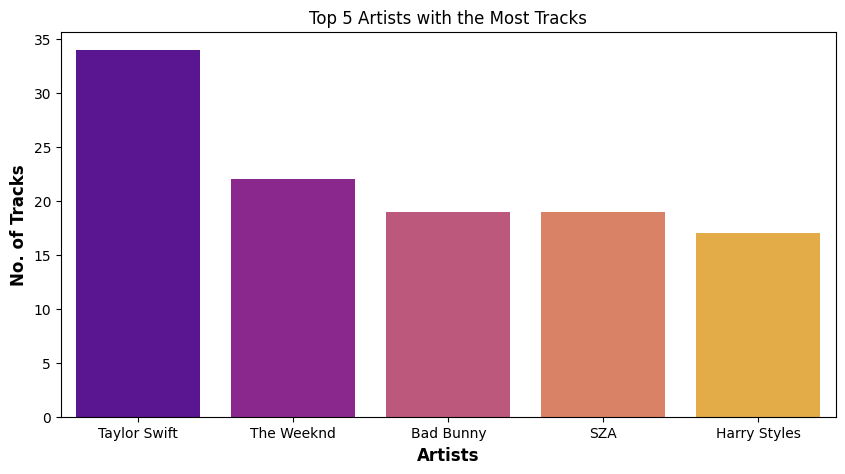

In [14]:
lead_artists=df['artist(s)_name'].value_counts().head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=lead_artists.index, y =lead_artists, palette ='plasma')
plt.ylabel('No. of Tracks', fontsize =12, fontweight ='bold')
plt.xlabel('Artists', fontsize =12, fontweight='bold')
plt.title('Top 5 Artists with the Most Tracks')
plt.show

In [15]:
average_acousticness_by_year=df.groupby('released_year')['acousticness_%'].mean().reset_index()
print(average_acousticness_by_year)


    released_year  acousticness_%
0            1930       22.000000
1            1942       91.000000
2            1946       84.000000
3            1950       88.000000
4            1952       64.000000
5            1957       78.500000
6            1958       75.666667
7            1959       86.000000
8            1963       52.000000
9            1968        7.000000
10           1970       27.000000
11           1971       32.000000
12           1973       39.000000
13           1975       35.000000
14           1979       36.000000
15           1982       18.500000
16           1983       54.000000
17           1984       11.000000
18           1985       54.000000
19           1986       18.000000
20           1987        9.000000
21           1991       37.000000
22           1992        1.000000
23           1994       16.000000
24           1995        6.000000
25           1996        5.000000
26           1997       42.000000
27           1998        0.000000
28           1

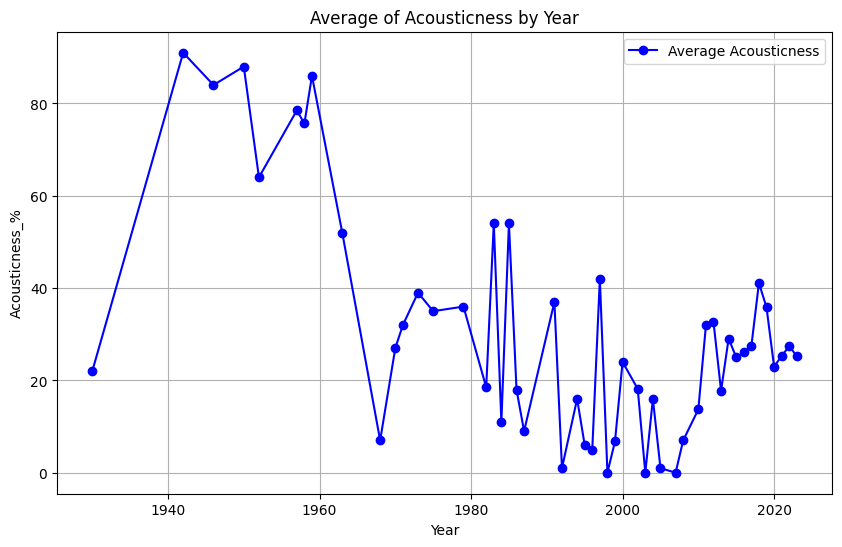

In [16]:
# Tracer la courbe de la moyenne de l'acousticness par année
plt.figure(figsize=(10, 6))
plt.plot(average_acousticness_by_year['released_year'], average_acousticness_by_year['acousticness_%'], marker='o', color='blue', linestyle='-')

# Ajouter des étiquettes et un titre
plt.xlabel('Year')
plt.ylabel('Acousticness_%')
plt.title('Average of Acousticness by Year')

# Afficher la légende
plt.legend(['Average Acousticness'])

# Afficher le graphique
plt.grid(True)
plt.show()


    released_year  danceability_%
0            1930       65.000000
1            1942       23.000000
2            1946       36.000000
3            1950       60.000000
4            1952       67.000000
5            1957       62.500000
6            1958       70.666667
7            1959       57.000000
8            1963       37.000000
9            1968       74.000000
10           1970       51.500000
11           1971       33.000000
12           1973       39.000000
13           1975       44.500000
14           1979       75.000000
15           1982       69.500000
16           1983       82.000000
17           1984       65.750000
18           1985       63.500000
19           1986       52.500000
20           1987       45.000000
21           1991       48.000000
22           1992       53.000000
23           1994       34.000000
24           1995       70.000000
25           1996       89.000000
26           1997       74.000000
27           1998       32.000000
28           1

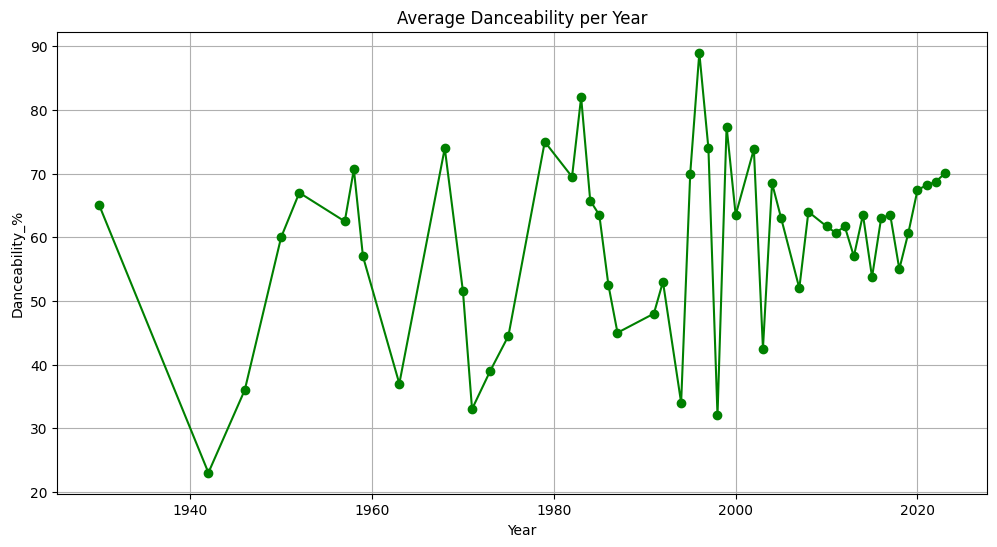

In [17]:
average_danceability_by_year=df.groupby('released_year')['danceability_%'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(average_danceability_by_year['released_year'],average_danceability_by_year['danceability_%'],marker='o',linestyle='-', color='g')
plt.xlabel('Year')
plt.ylabel('Danceability_%')
plt.title('Average Danceability per Year')
plt.grid(True)
plt.show
print(average_danceability_by_year)

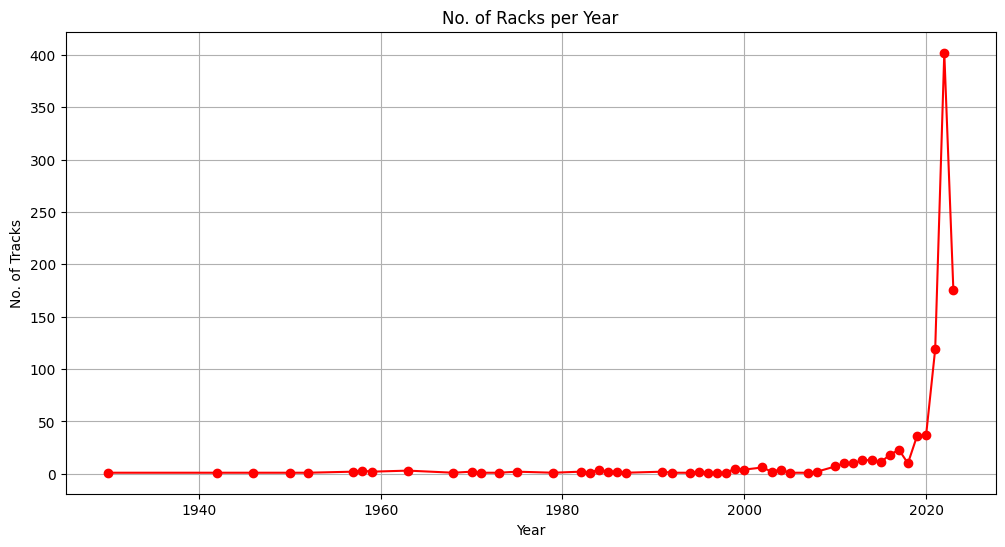

    released_year  track_name
0            1930           1
1            1942           1
2            1946           1
3            1950           1
4            1952           1
5            1957           2
6            1958           3
7            1959           2
8            1963           3
9            1968           1
10           1970           2
11           1971           1
12           1973           1
13           1975           2
14           1979           1
15           1982           2
16           1983           1
17           1984           4
18           1985           2
19           1986           2
20           1987           1
21           1991           2
22           1992           1
23           1994           1
24           1995           2
25           1996           1
26           1997           1
27           1998           1
28           1999           5
29           2000           4
30           2002           6
31           2003           2
32        

In [18]:
racks_per_year= df.groupby('released_year')['track_name'].count().reset_index()
plt.figure(figsize=(12,6))
plt.plot(racks_per_year['released_year'],racks_per_year['track_name'],marker='o',linestyle='-',color='r')
plt.xlabel('Year')
plt.ylabel('No. of Tracks')
plt.title('No. of Racks per Year')
plt.grid(True)
plt.show()

print(racks_per_year)